# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [27]:
from src.Lab_2_4_LR2 import LinearRegressor


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [28]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [29]:
linreg = LinearRegressor()
linreg.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [30]:
from src.Lab_2_4_LR2 import evaluate_regression

In [31]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275276, 'RMSE': 1.0126472956832233, 'MAE': 0.8945454545454552}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [32]:
data = pd.read_csv("../data/synthetic_dataset.csv")
print(data.head())

# Obtain inputs and output from data
X = data[['Input1', 'Input2', 'Input3', 'Input4']].values 
y = data['Output'].values

     Input1    Input2    Input3    Input4     Output
0  1.764052 -0.202117  0.330046  0.371232   6.788989
1  0.400157 -0.833231 -0.000480  0.304784   2.972974
2  0.978738  1.733600  0.818116  0.504125   7.089140
3  2.240893  0.190649  0.428214  0.135300  11.170032
4  1.867558 -0.177810 -2.503947  0.653759   8.199762


In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [33]:
# TODO: Train linear regression model
linreg.fit(X, y)

In [34]:
# TODO: Obtain and print the regression performance metrics
y_pred = linreg.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.5452814241832913, 'RMSE': 3.1936452748702813, 'MAE': 2.2373945210247843}


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> Queremos verificar los residuos para ver exactamente cómo están realmente distribuidos y no confiar en métricas. Así, se puede hacer una análisis y una adaptación más adecuada a los datos usados.

In [35]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    # Calculate residuals
    residuals = data[output_column] - data[prediction_column] 
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # TODO: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist='norm', plot=plt)       # Fill the code here
    plt.title('Q-Q Plot of Residuals')

    # TODO: Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(data[output_column], residuals, alpha=0.5)     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col], residuals, alpha=0.5)   # Fill the code here
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: None


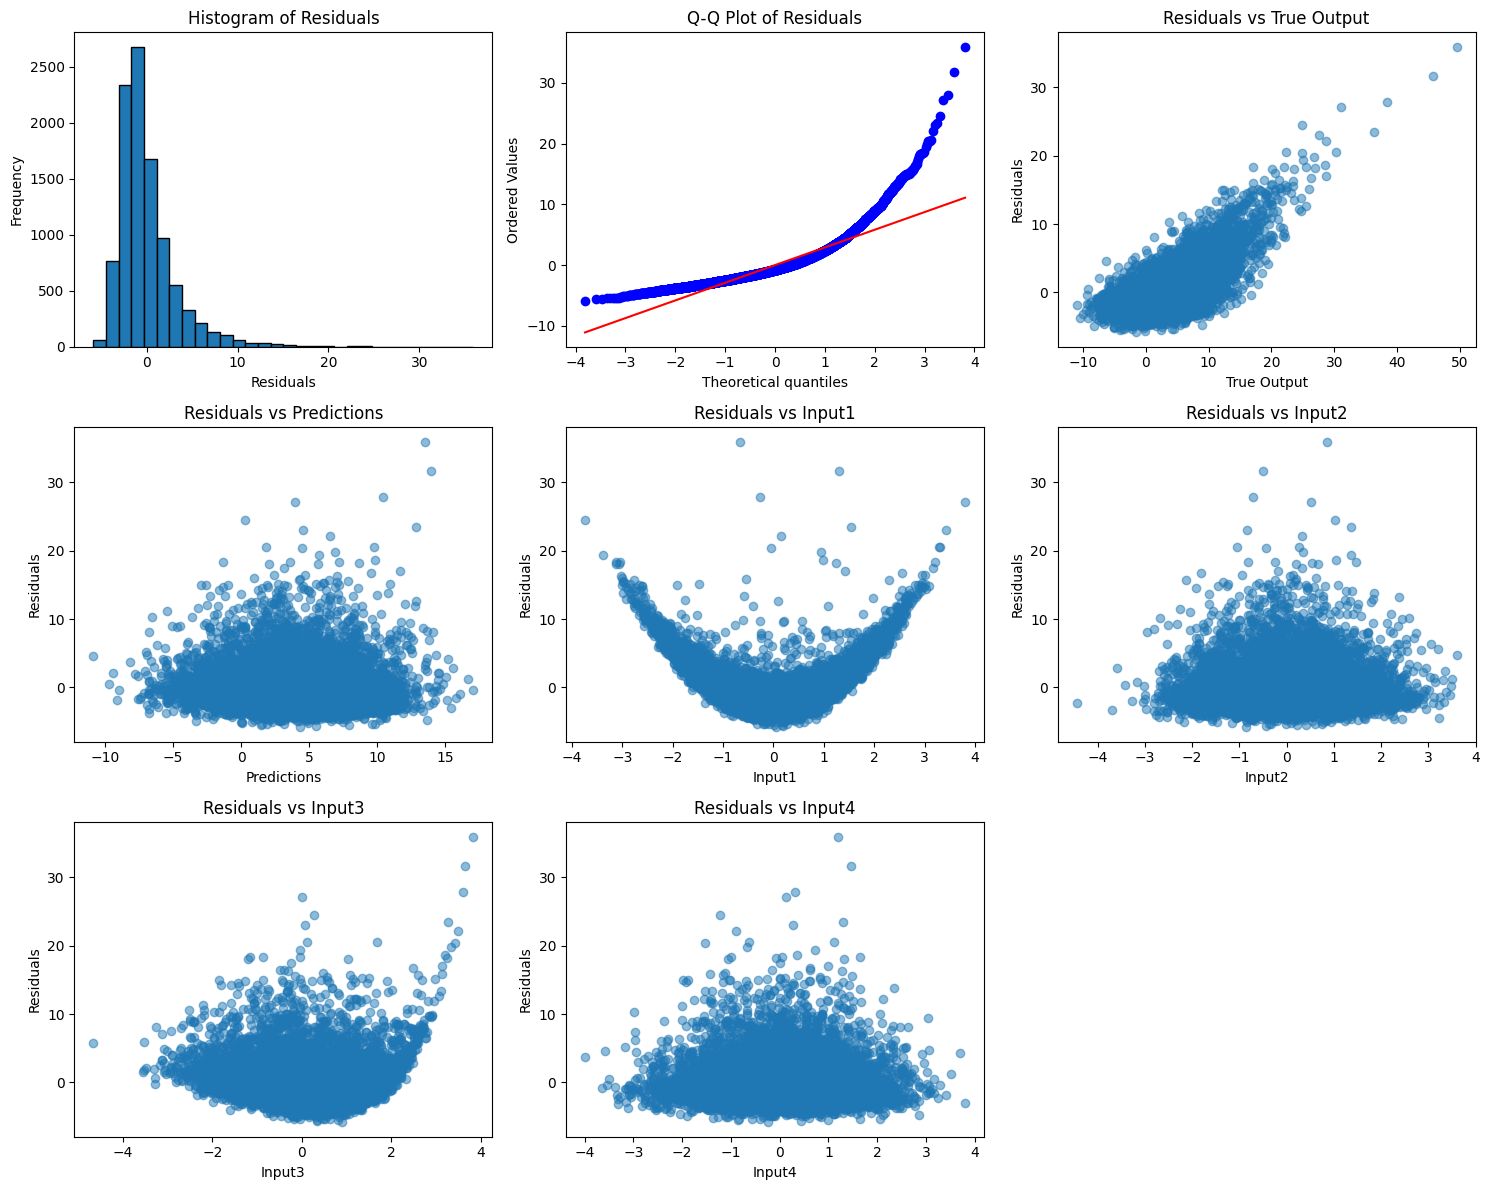

In [36]:
# TODO:  First, construct a dictionary of the coefficients to print them
coef_dict = None 
print(f"Coefficients of the model: {coef_dict}")

# Plot the residuals for the predictions
data["Predictions"] = linreg.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
> En el histograma se puede ver como estos no están distribuidos de forma normal sino que tienen una cola hacia la derecha. Este resultado lo podemos comprobar también en el Q-Q plot donde hay una desviación de los cuantiles a ambos lados del gráfico.

> En el gráfico de Residuals vs True Output, se puede ver un comportamiento parecido al histograma, con una acumulación de los datos abajo a la izquierda y una cola hacia la derecha.

> El gráfico de Residuals vs Predictions si que muestra una forma más normal.

> Analizando para cada variable, Input 2 y 4 si que tienen una forma más normal. Input 3 tiene una forma exponencial e Input 1 tiene forma de parábola.

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [37]:
# TODO
input1 = data['Input1'].values
input2 = data['Input2'].values
input3 = data['Input3'].values
input4 = data['Input4'].values
output = data['Output'].values
data_transf = pd.DataFrame({'Input1': input1 ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(input3),
                            'Input3': input4,
                            'Output': output})
X_transf = data_transf.iloc[:,:3].values

# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9557524745534756, 'RMSE': 0.9962304737909358, 'MAE': 0.7956340344398113}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> Al analizar los coeficientes se puede ver que ahora hay una mayor correlación entre los datos (se ha minimizado el error).

> Ahora, viendo el histograma y el Q-Q plot se puede ver que sí que hay una distribución normal. A la vez que en el gráfico de Residual vs True Output y Residuals vs Predictions los datos están centrados en el (0,0).

> Analizando para cada variable, como para Input 1 se ha elevado al cuadrado e input 2 es ahora exp(Input 3), estas variables solo pueden tomar valores positivos, cosa que que comprueba en los gráficos. Para Input 3 (antes Input 4), no se le ha aplicado ninguna función y en este caso se verifica que los datos están centrados en el (0,0).

Coefficients of the model: {'Input1': 1.9985407741302759, 'Input2': 0.995125930021852, 'Input3': 2.9880699293625486}


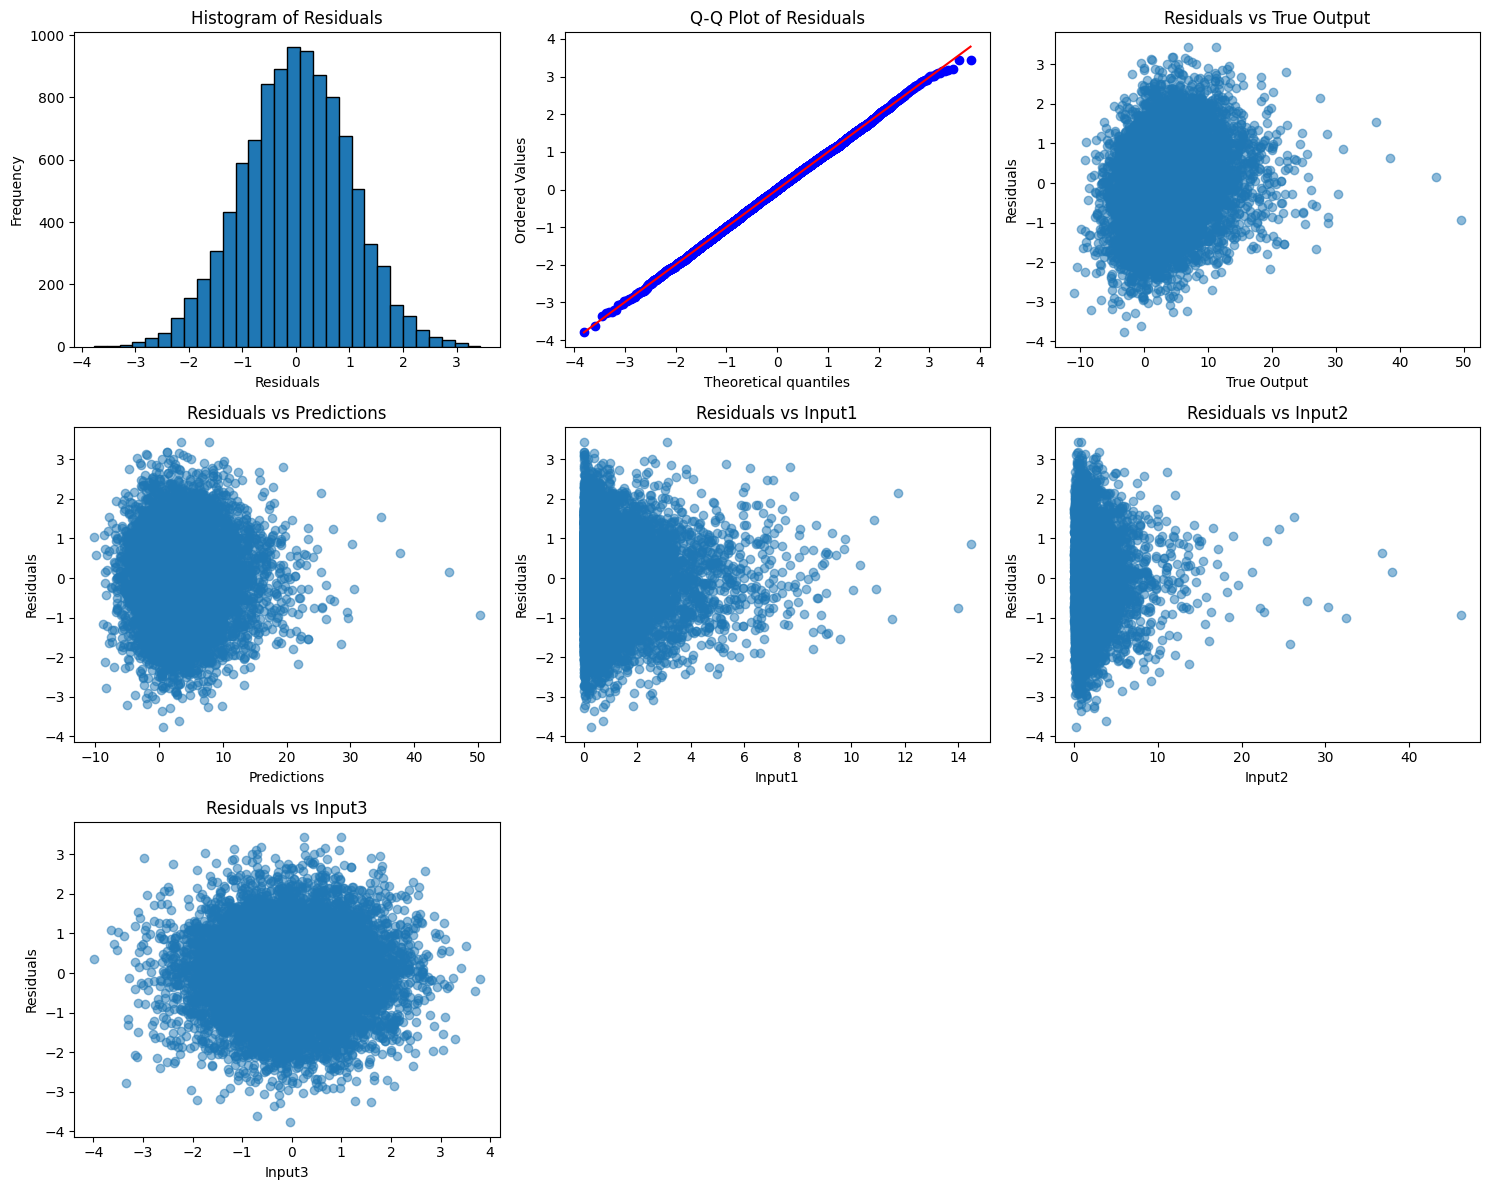

In [38]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")
data_transf["Predictions"] = linreg.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [39]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [40]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163565}


Compare yourself with scikit

In [41]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data) 

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163589}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

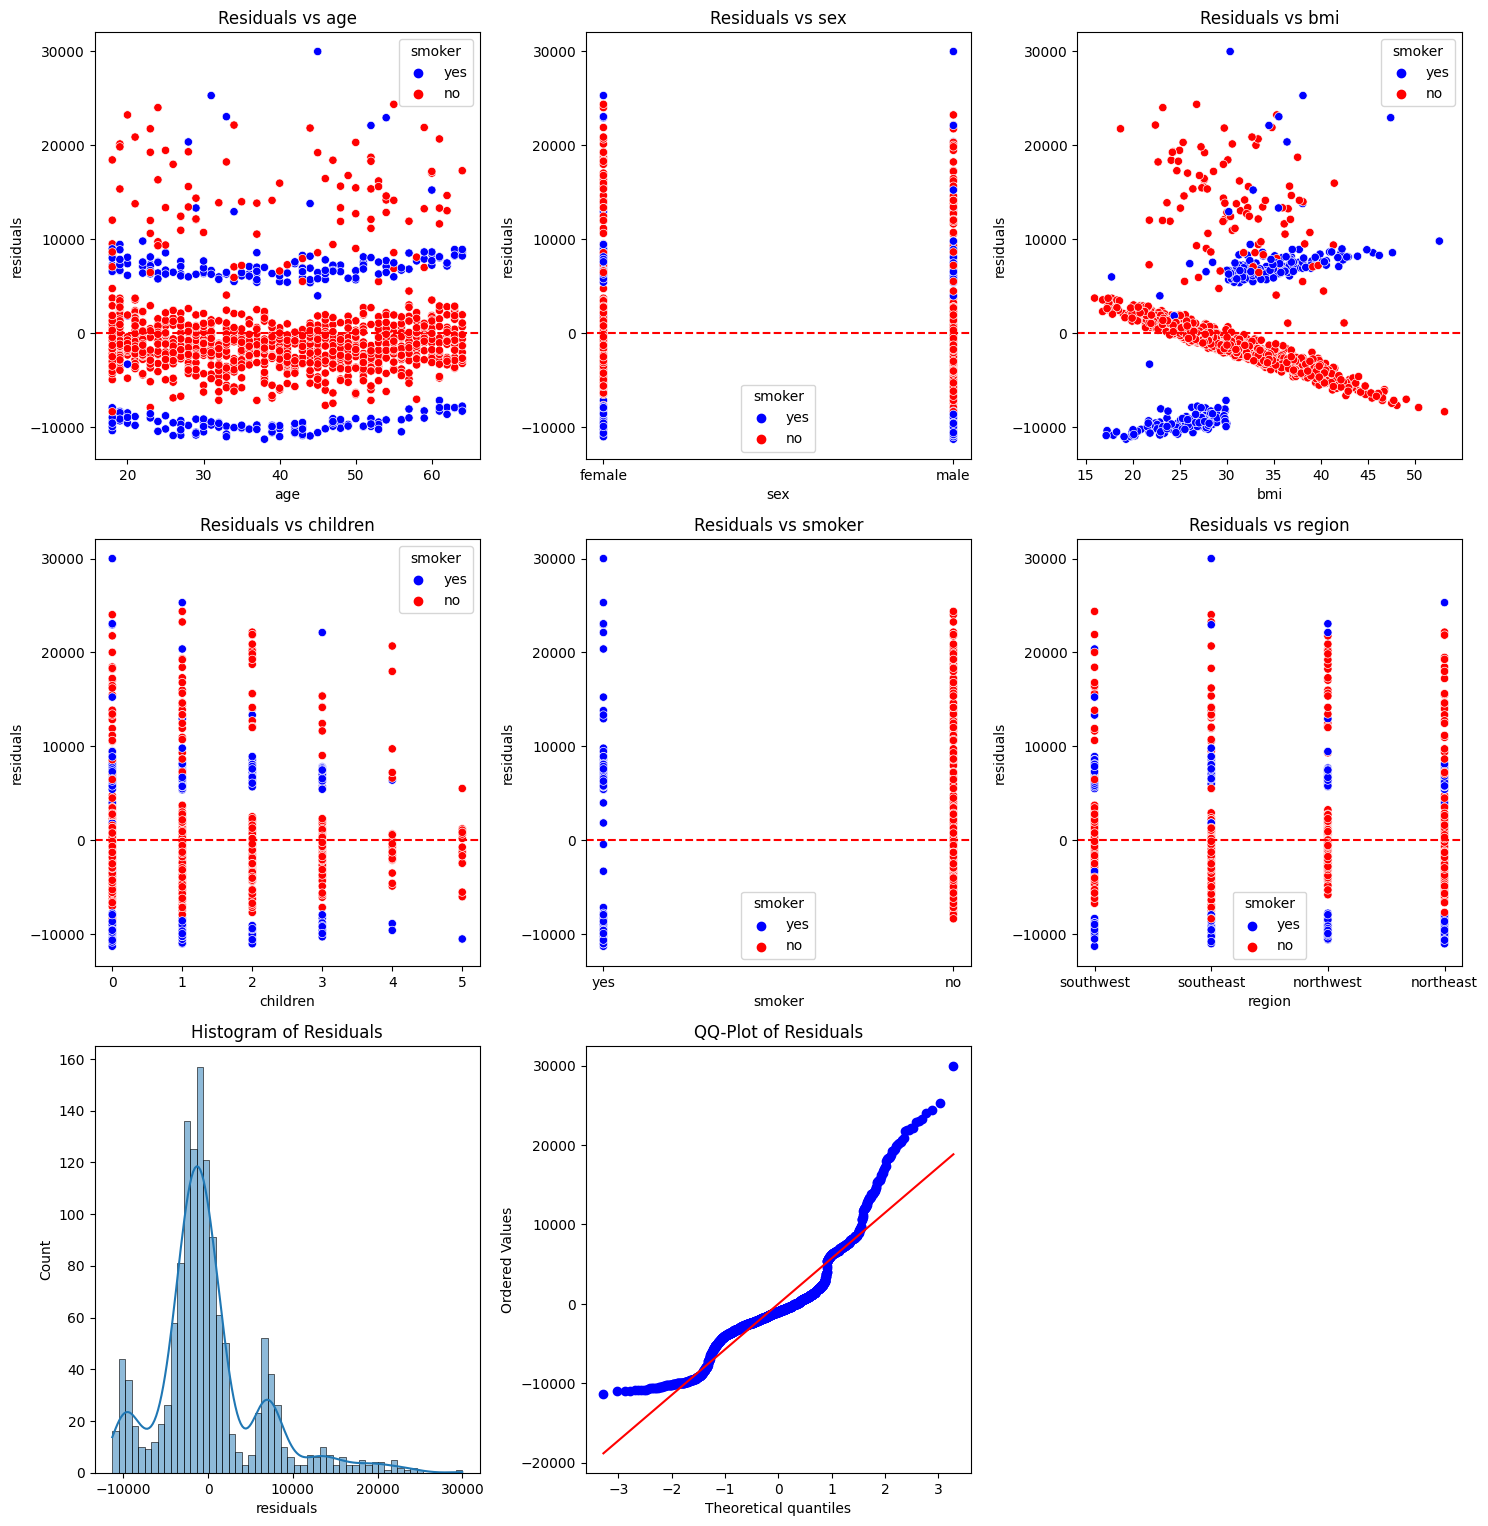

In [42]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # As before, calculate residuals
    data['residuals'] = data[output_column] - data[prediction_column]

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns:
            colores = ['blue', 'red']
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax, hue = data[categorical_var], palette=colores)
        else:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
Analizando cada uno de los gráficos se tiene:

> Residuals vs age: La edad (discreta en este conjunto) muestra la mayoría de los residuos cerca de cero, lo que sugiere que el modelo predice razonablemente bien en función de la edad.

>Residuals vs sex: Al ser una variable categórica, no se aprecia una diferencia notable entre ambos sexos: los residuos se distribuyen de forma similar.

> Residuals vs bmi: El BMI, variable continua, presenta un patrón de residuos sin indicios claros de sesgo grave. La mención de la “paradoja de Simpson” requeriría un análisis más profundo.

> Residuals vs children: El número de hijos es discreto y, como es lógico, hay menos datos conforme aumenta la cantidad de hijos. Aun así, los residuos no varían sustancialmente entre categorías.

> Residuals vs smoker: El modelo parece ajustarse mejor a no fumadores que a fumadores, lo que indica un posible punto de mejora.

> Residuals vs region: No se observan grandes diferencias entre regiones; sin embargo, persiste la brecha entre fumadores y no fumadores.

> Histograma y Q-Q plot: el histograma muestra una moda más grande centrada en 0 y otras dos más pequeñas una en -10000 y la otra en 10000 a su vez, con el Q-Q plot confirma que los residuos no se distribuyen como una normal.

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

In [44]:
from src.Lab_2_4_LR2 import LinearRegressor

In [45]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [46]:
# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1).values
y = data_encoded['charges'].values

In [61]:
linreg = LinearRegressor()
linreg.fit(X, y , method='gradient_descent', learning_rate=0.00001, iterations=100000)

Epoch 0: MSE = 322639078.7164617
Epoch 10: MSE = 195877258.9819648
Epoch 20: MSE = 152826256.6963822
Epoch 30: MSE = 138199428.90300038
Epoch 40: MSE = 133224095.22916092
Epoch 50: MSE = 131525957.55635776
Epoch 60: MSE = 130940610.9685018
Epoch 70: MSE = 130733127.43843679
Epoch 80: MSE = 130653960.42400354
Epoch 90: MSE = 130618375.56038979
Epoch 100: MSE = 130597600.76968233
Epoch 110: MSE = 130581866.08264521
Epoch 120: MSE = 130567853.74272126
Epoch 130: MSE = 130554436.86566116
Epoch 140: MSE = 130541232.49326804
Epoch 150: MSE = 130528110.27978276
Epoch 160: MSE = 130515025.66507982
Epoch 170: MSE = 130501963.22796093
Epoch 180: MSE = 130488917.45131329
Epoch 190: MSE = 130475886.19054604
Epoch 200: MSE = 130462868.45545956
Epoch 210: MSE = 130449863.65676002
Epoch 220: MSE = 130436871.34990707
Epoch 230: MSE = 130423891.14784302
Epoch 240: MSE = 130410922.69107553
Epoch 250: MSE = 130397965.63724472
Epoch 260: MSE = 130385019.65731552
Epoch 270: MSE = 130372084.43402877
Epoch 2

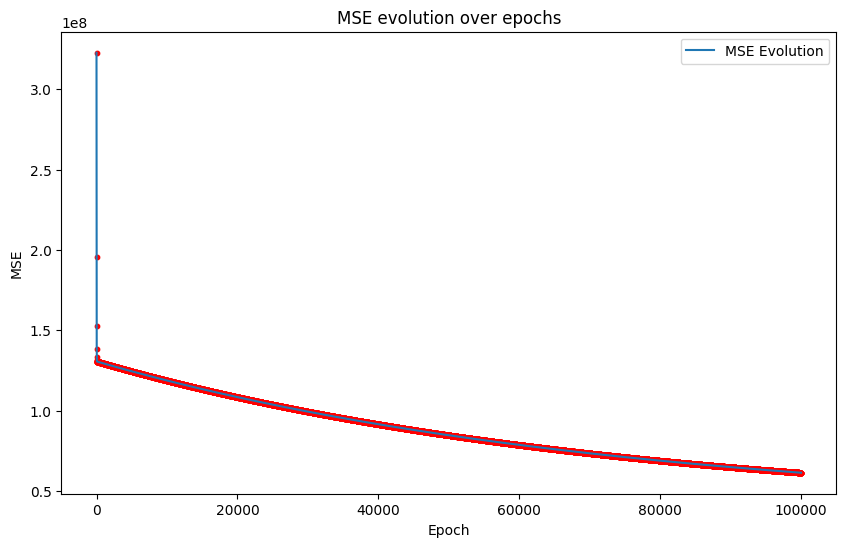

In [62]:
# Assuming mse_evolution is a 2D array with two columns
mse_evolution = np.array(linreg.mse_evolution)

# Plot the first column as y-axis and the second column as x-axis
plt.figure(figsize=(10, 6))
plt.plot(mse_evolution[:, 1], mse_evolution[:, 0], label='MSE Evolution')
plt.scatter(mse_evolution[:, 1], mse_evolution[:, 0], color='red', s=10)  # Add points
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE evolution over epochs')
plt.legend()
plt.show()


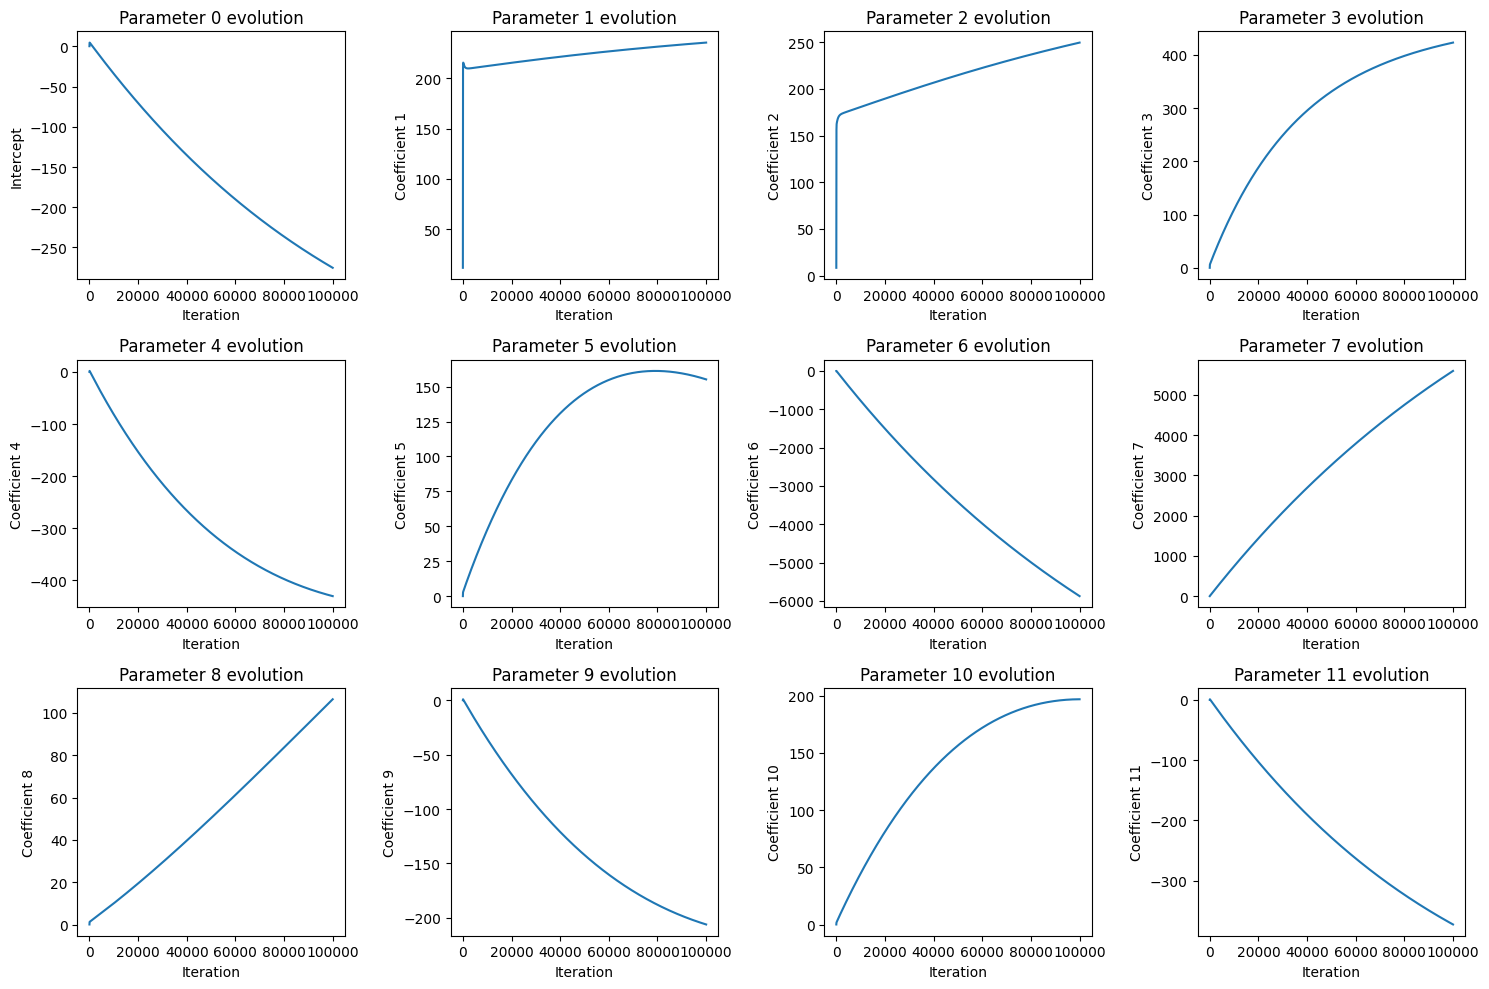

In [63]:
parametros = np.array(linreg.param_evolution)
n_params = parametros.shape[1]

# Calculate grid dimensions (making it as square as possible)
import math
n_cols = math.ceil(math.sqrt(n_params))
n_rows = math.ceil(n_params / n_cols)

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each parameter evolution
for i in range(n_params):
    ax = axes[i]
    ax.plot(parametros[:, i])
    ax.set_xlabel('Iteration')
    if i == 0:
        ax.set_ylabel('Intercept')
    else:
        ax.set_ylabel(f'Coefficient {i}')
    ax.set_title(f'Parameter {i} evolution')

# Hide any unused subplots
for i in range(n_params, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

> Al aumentar el número de iteraciones se puede observar que los parámetros empiezan a tender a valores concretos